<a href="https://colab.research.google.com/github/adityasaxena-crypto/Stock-Price-Prediction/blob/main/VI_stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
from keras.models import Sequential
from turtle import *
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
plt.style.use('fivethirtyeight')

In [ ]:
#GETTING THE DATA DROM YAHOO
df = web.DataReader('IDEA.NS' , data_source='yahoo' , start='1996-01-01' , end='2021-02-20')
#FOR DISPPLAYING THE DATAFRAME
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-03-09,55.473148,50.890587,51.252365,51.674442,290137891.0,50.875359
2007-03-12,54.237064,51.795036,52.578899,52.850235,38738166.0,52.032963
2007-03-13,54.990772,51.945782,53.061272,54.267212,46376399.0,53.428032
2007-03-14,54.749584,52.186970,52.458305,52.910530,30761009.0,52.092327
2007-03-15,56.799683,53.212013,53.212013,55.201813,56159369.0,54.348175
...,...,...,...,...,...,...
2021-02-15,12.900000,11.900000,12.150000,12.100000,333722604.0,12.100000
2021-02-16,12.250000,11.650000,12.200000,11.750000,213050922.0,11.750000
2021-02-17,12.400000,11.650000,11.750000,11.900000,236876381.0,11.900000


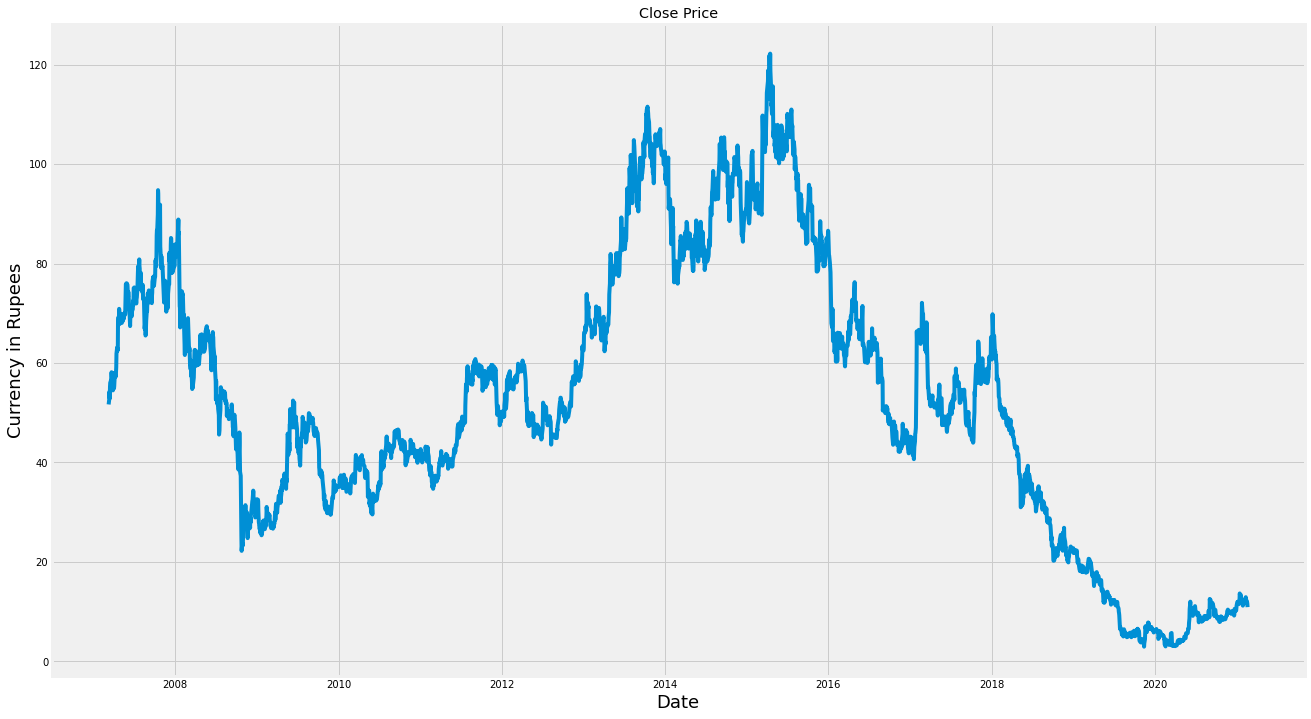

In [ ]:
plt.figure(figsize=(20,12))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Currency in Rupees',fontsize=18)
plt.show()

In [ ]:
#number of rows and column
df.shape


(3433, 6)

In [ ]:
#GETTING THE DATA DROM YAHOO
df1 = web.DataReader('AAPL' , data_source='yahoo' , start='2002-01-01' , end='2021-01-11')
#FOR DISPPLAYING THE DATAFRAME
df1


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-01-02,0.416071,0.392143,0.393750,0.416071,529496800.0,0.358388
2002-01-03,0.424107,0.406607,0.410714,0.421071,612007200.0,0.362695
2002-01-04,0.427679,0.410536,0.416786,0.423036,409976000.0,0.364388
2002-01-07,0.428571,0.406250,0.423571,0.408929,444584000.0,0.352237
2002-01-08,0.411607,0.401071,0.406250,0.403750,450038400.0,0.347775
...,...,...,...,...,...,...
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.814514
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.411102
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.724655


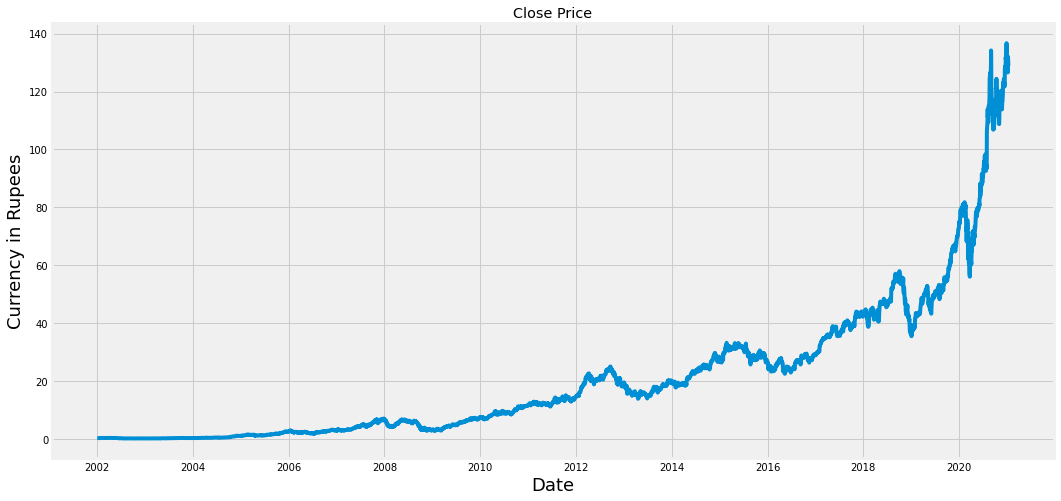

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df1['Close'])
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Currency in Rupees',fontsize=18)
plt.show()

In [ ]:
data= df.filter(['Close'])
dataset=data.values
#training data length
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2747

In [ ]:
#scale the data so that it dosent focus just only on high value weight
scaler = MinMaxScaler(feature_range=(0,1))
#this finds the minimum and maximum values in the dataset
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.40841273],
       [0.41826833],
       [0.43014556],
       ...,
       [0.07501971],
       [0.07208599],
       [0.06663762]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the  the data into two
x_train = []
y_train = []
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

#so what it does is that it takes value from first 60 days and print out the
#thing or the value in the 61st day

[array([0.40841273, 0.41826833, 0.43014556, 0.41877373, 0.43797947,
       0.44480255, 0.44834047, 0.449604  , 0.44505528, 0.46274476,
       0.45415272, 0.44530798, 0.43216722, 0.46122853, 0.45339462,
       0.43545241, 0.43949573, 0.44783504, 0.45465815, 0.45794334,
       0.45541625, 0.46249206, 0.4715895 , 0.49408043, 0.50444143,
       0.49862918, 0.50115624, 0.50065084, 0.55296118, 0.55624637,
       0.55447744, 0.56963986, 0.56281675, 0.54386374, 0.55245578,
       0.56130049, 0.54942326, 0.5458854 , 0.54790706, 0.54917059,
       0.55473017, 0.54891786, 0.55245578, 0.55852076, 0.55371931,
       0.56180595, 0.56054242, 0.55927889, 0.56028969, 0.57570484,
       0.58682394, 0.61133653, 0.61285279, 0.61083113, 0.59617411,
       0.61133653, 0.60704048, 0.5898564 , 0.59844844, 0.59162539])]
[0.5870766735884254]



In [ ]:
#we will turn them into numpy array
x_train,y_train = np.array(x_train),np.array(y_train)
#print(x_train)
#print(y_train)

In [ ]:
#reshape the data
#because lstm requires a 3d dataa
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [ ]:
#building a model
model = Sequential()
model.add(LSTM(70 , return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(70, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#fit the mmodel
model.fit(x_train,y_train,batch_size=1,epochs=1)

2687/2687 [==============================] - 83s 30ms/step - loss: 0.0036


In [ ]:
test_data =scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test =  np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#getting the rmse 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7887994575778527

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


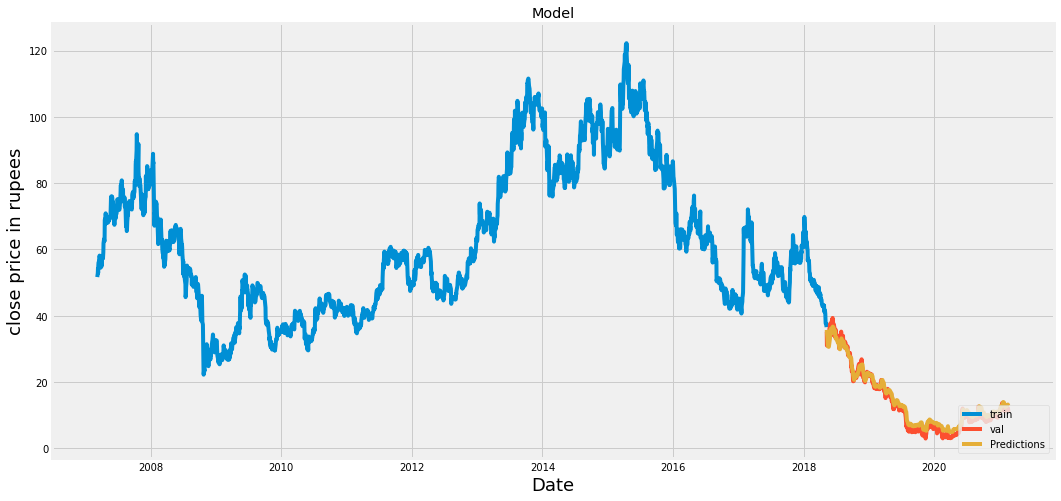

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in rupees', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','val','Predictions'],loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2018-05-10,35.183243,35.736042
2018-05-11,30.992607,35.049057
2018-05-14,31.203646,33.477108
2018-05-15,32.017654,32.074875
2018-05-16,31.806616,31.291336
...,...,...
2021-02-15,12.100000,13.200406
2021-02-16,11.750000,13.209902
2021-02-17,11.900000,13.082960


In [ ]:
#get the quote
relaince_quote = web.DataReader('IDEA.NS' , data_source='yahoo' , start='1996-01-01' , end='2021-02-10')
new_df = relaince_quote.filter(['Close'])
#last 60 days
last_60_days =new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#empty array
X_test = []
          #append
X_test.append(last_60_days_scaled)
#convert 
X_test= np.array(X_test)
X_test= np.reshape(X_test,( X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[13.043459]]


In [ ]:
relaince_quote2 = web.DataReader('IDEA.NS' , data_source='yahoo' , start='2021-02-19' , end='2021-02-20')
print(relaince_quote2['Close'])

Date
2021-02-19    10.9
Name: Close, dtype: float64


ValueError: ignored